In [2]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import random
from gretel_synthetics.timeseries_dgan.dgan import DGAN
import cnn_func  

2024-03-28 16:47:20.395230: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-28 16:47:20.395257: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-28 16:47:20.396183: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-28 16:47:20.401816: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-28 16:47:21.231380: W tensorflow/compiler/tf2

In [3]:
MODEL = 0

In [4]:
model_name = 'th_v_air' if MODEL==0 else 'el_v_sky'
index = [0,3] if MODEL==0 else [1,2]

Train scalers for unscaling later

In [8]:
from sklearn.preprocessing import MinMaxScaler

scalers = {var_name: MinMaxScaler(feature_range=(-1,1)) for var_name in ['G.air.T', 'G.E_th_I']}

base_data_train, base_data_test = np.load('../../data/training_data/training_data_1month.npy', allow_pickle=True)
base_data_train, base_data_test = base_data_train[:,:,index], base_data_test[:,:,index]

temp_var, energy_var = base_data_train[:,:,0], base_data_train[:,:,1]
temp_var_test, energy_var_test = base_data_test[:,:,0], base_data_test[:,:,1]

temp_var = scalers['G.air.T'].fit_transform(temp_var)
energy_var = scalers['G.E_th_I'].fit_transform(energy_var)

temp_var_test = scalers['G.air.T'].fit_transform(temp_var_test)
energy_var_test = scalers['G.E_th_I'].fit_transform(energy_var_test)

scaled_data_train, scaled_data_test = np.stack((temp_var, energy_var), axis=-1), np.stack((temp_var_test, energy_var_test), axis=-1)

In [9]:
b_sizes = [2,4,6,8,10,12,16,20,24,32]
e_sizes = [100, 500, 1000]

batch_list = []
for b in b_sizes:
    epoch_list = []
    for e in e_sizes:
        model = DGAN.load(f'../../data/models/model_data/DGAN_{model_name}_b{b}_e{e}.zip')
        attributes, samples = model.generate_numpy(1000)
        epoch_list.append(samples)
    batch_list.append(epoch_list)

In [ ]:
results = []
for i, b in enumerate(batch_list):
    for j, e in enumerate(b):
        result = cnn_func.test_cnn_wrapper(e, scaled_data_test)
        print(b_sizes[i], e_sizes[j], result)
        results.append({f'{b_sizes[i]}_{e_sizes[j]}':result})

RUN: 0

Epoch 76: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 90: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 97: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
1/1 [==============================] - 0s 62ms/step
RUN: 1

Epoch 72: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 83: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 92: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 99: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
1/1 [==============================] - 0s 64ms/step
RUN: 2

Epoch 84: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 94: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
1/1 [==============================] - 0s 60ms/step
RUN: 3

Epoch 66: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 81: ReduceLROnPlateau reducing

In [ ]:
print(results)

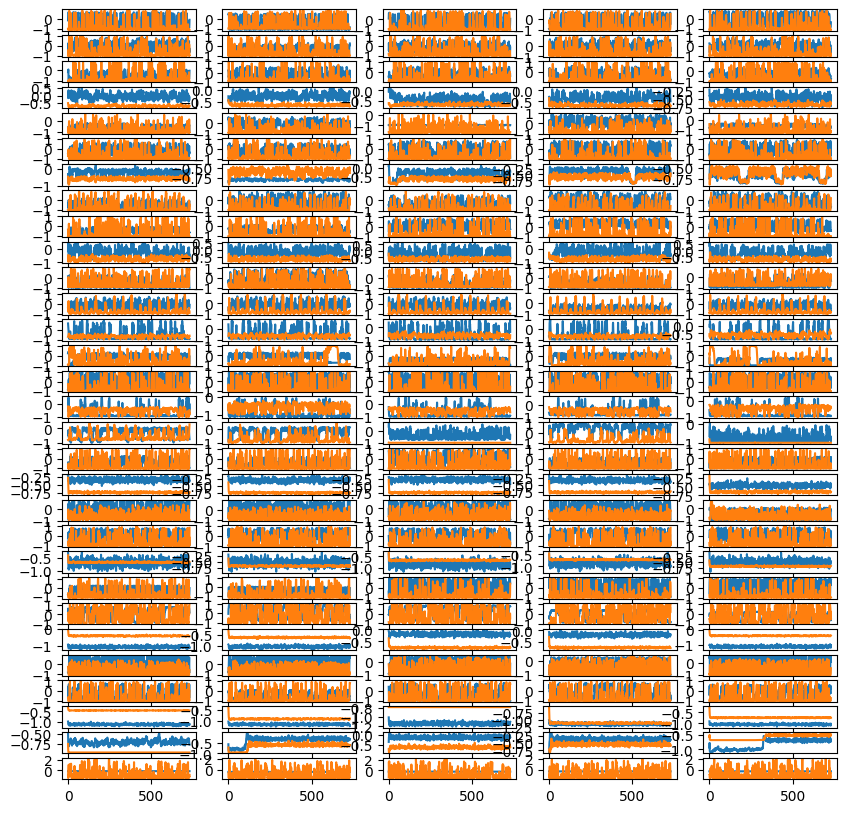

In [52]:
fig, ax = plt.subplots(len(sample_list), 5, figsize=(10,10))
sample_indices = random.sample(range(100),5)

for i, sample in enumerate(sample_list):
    for j, sample_index in enumerate(sample_indices):
        ax[i,j].plot(sample[sample_index])

plt.show()

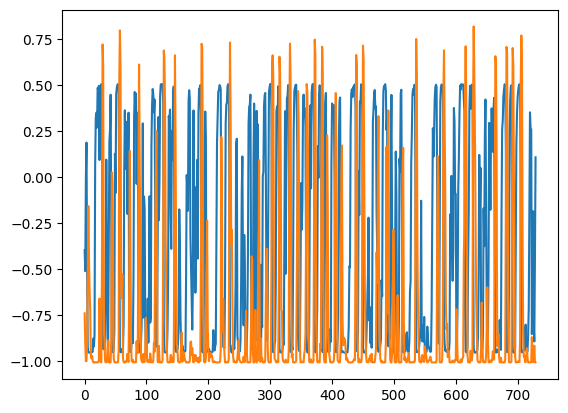

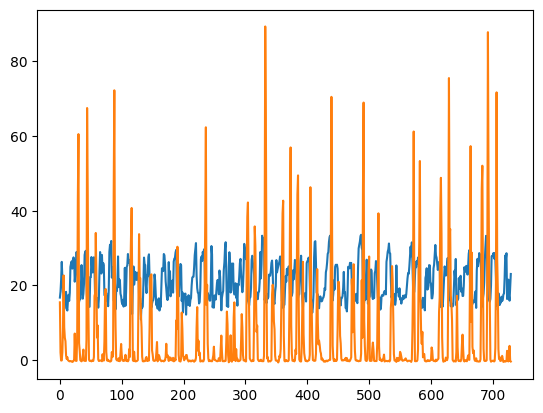

In [48]:
num = 0

sample = sample_list[num]

temp_var, energy_var = sample[:,:,0],  sample[:,:,1]
temp_var, energy_var = scalers['G.air.T'].inverse_transform(temp_var), scalers['G.E_th_I'].inverse_transform(energy_var)

synthetic_features_rescaled = np.stack((temp_var, energy_var),axis=-1)
plt.plot(sample_list[num][0])
plt.show()
plt.plot(synthetic_features_rescaled[0])